# 🌪️ 합성곱 신경망
CNN: Convolutional Neural Network

### 📥 Import

In [ ]:
import os
import sys
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
print(f'현재 작업 디렉토리: "{os.getcwd()}"')

from common.trainer import Trainer
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet

현재 작업 디렉토리: "g:\zer0ken\ms-ai-school\neural-net\ch06 합성곱 신경망"


### 🔍 필터 시각화

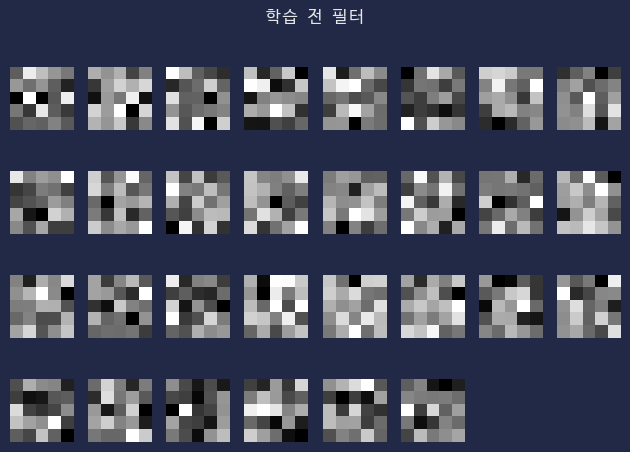

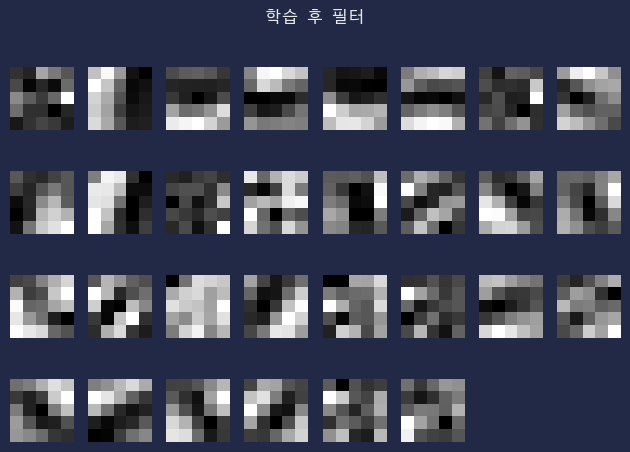

In [3]:
def filter_show(filters, nx=8, margin=3, scale=10, label=None):
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))
    
    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    
    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i + 1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.suptitle(label)
    plt.tight_layout()
    plt.show()


network = SimpleConvNet()
filter_show(network.params['W1'], label='학습 전 필터')

network.load_params('./data/params.pkl')
filter_show(network.params['W1'], label='학습 후 필터')

### ✍️ MNIST 데이터셋으로 학습시키기

In [9]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)
x_train = x_train[:5000]
t_train = t_train[:5000]
x_test = x_test[:1000]
t_test = t_test[:1000]

network = SimpleConvNet(
    input_dim=(1, 28, 28), hidden_size=100, output_size=10,
    weight_init_std=0.01,
    conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1}
)

# 아래는 이미 학습된 가중치를 불러오는 코드입니다.
# network.load_params('./data/params.pkl')

max_epoch = 20
trainer = Trainer(
    network=network, 
    x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test,
    epochs=max_epoch, mini_batch_size=100,
    optimizer='Adam', optimizer_param={'lr': 0.001},
    evaluate_sample_num_per_epoch=1000
)

trainer.train()

train loss:2.2992654030160002
=== epoch:1, train acc:0.259, test acc:0.278 ===
train loss:2.297031250335788
train loss:2.29355768845151
train loss:2.2886099307198524
train loss:2.2835958543295454
train loss:2.266496458774627
train loss:2.254188156506909
train loss:2.253907063294217
train loss:2.22301774396294
train loss:2.1992968941145654
train loss:2.1299712842742737
train loss:2.1280493239261515
train loss:2.0811415190940448
train loss:2.0386926606324156
train loss:1.9884422305992238
train loss:1.902519702756965
train loss:1.8240245517124831
train loss:1.7900526204940528
train loss:1.7657583849440814
train loss:1.6353346353540692
train loss:1.5529601472461807
train loss:1.5215033923883268
train loss:1.3133819891473504
train loss:1.29937614775394
train loss:1.3248360878078989
train loss:1.0847428981726308
train loss:1.0475750743567849
train loss:1.0602258042991748
train loss:1.044331012937006
train loss:0.9496404227908348
train loss:0.8592914420342397
train loss:0.8017338763416659
tra

In [11]:
# 가중치를 파일로 출력
network.save_params('./data/trained_params.pkl')

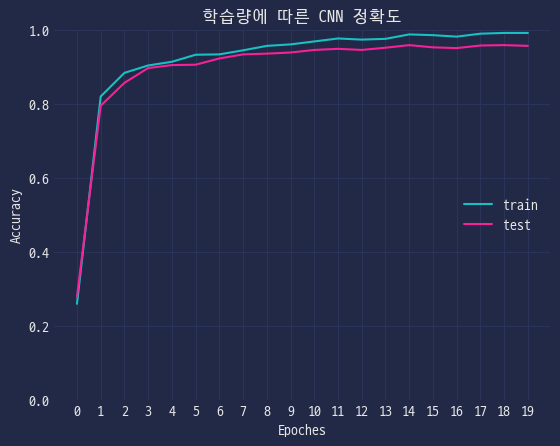

In [18]:
# 그래프 그리기
x = np.arange(max_epoch)
plt.plot(x, trainer.train_acc_list, label='train')
plt.plot(x, trainer.test_acc_list, label='test')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.title('학습량에 따른 CNN 정확도')
plt.ylim(0, 1)
plt.legend(loc='center right')
plt.xticks(x)
plt.show()